# **Assignment#5**
### **Unsupervised MLs, Clustering and Profiling on 'Bank marketing data' & Association Analysis on 'TV_Shows-Association_Rules_Learning Data'**
    Dep  : Department of E-Business - Undergraduate, AJOU School of Business, Ajou University
    Code : 201823869 
    Name : seongwoo Cho

<br>

#### **INDEX** 

**A. Clustering and Profiling**
1. Summarize the data set <br>
2. Prepare the data to build a model <br>
3. Build a hybrid model with the k-means clustering and the agglomerative clustering <br>
4. Visualize the clusters in terms of key predictors<br>

<br>

**B. Association Rules**
1. Prepare the data to find out association rules and drop NA <br>
2. Visualzie the most popular 10 items in the data set
3. Show a list of association rules
4. Recommend several item sets of the TV shows based on the support, confidence, and lift measures

<br><br>

---

<br><br>

# **A. Clustering and Profiling**

The data is related to direct marketing campaigns of a Portuguese banking institution. Cluster customers based on their attributes.<br>The data set (the “bankmarketing.csv” file) has the following variables:

1. ***age (numeric)***
2. ***job***: type of job (categorical: admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)
3. ***marital***: marital status (categorical: divorced, married, single, unknown; note: divorced includes divorced and widowed)
4. ***education*** (categorical: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)
5. ***default***: has credit in default? (categorical: no, yes, unknown)
6. ***housing***: has housing loan? (categorical: no, yes, unknown)
7. ***loan***: has personal loan? (categorical: no, yes, unknown)
8. ***contact***: contact communication type (categorical: cellular, telephone)
9. ***month***: last contact month of year (categorical: jan, feb, mar,..., nov, dec)
10. ***day_of_week***: last contact day of the week (categorical: mon, tue, wed, thu, fri)
11. ***poutcome***: outcome of the previous marketing campaign (categorical: failure, nonexistent, success)

<br><br>
### ***A0. Preparing***

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_bm = pd.read_csv('bankmarketing.csv')


### ***A1. Summarize the data set***

In [93]:
df_bm.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [94]:
df_bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [95]:
df_bm.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### ***A2. Prepare the data to build a model***
Prepare the data to build a model. Use the “preprocessing.LabelEncoder()” function

### preprocessing

In [96]:
#To avoid mulicorinality drop the higly correltaed column
df_bm = df_bm.drop(["emp.var.rate","nr.employed","y"],axis=1)
df_bm.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,4.857
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,4.857
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,4.857
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,4.857
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,4.857


The total number of data-points after removing the rows with missing values are: 41188


Text(0.5, 1.0, 'Variable Correlation')

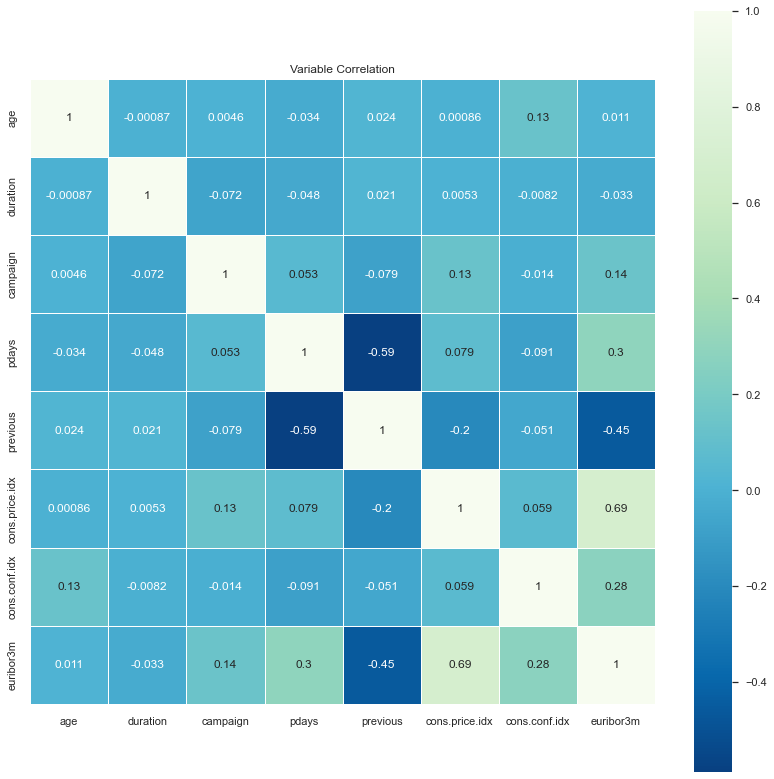

In [97]:
# drop missing values
df_bm_p = df_bm.dropna()

print("The total number of data-points after removing the rows with missing values are:", len(df_bm_p))

#Correlation Plot
import seaborn as sns
plt.figure(figsize=(14,14))
sns.set(font_scale=1)
sns.heatmap(df_bm_p.corr(),cmap='GnBu_r',annot=True, square = True ,linewidths=.5);
plt.title('Variable Correlation')

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
#Feature Engineering

    # Get list of categorical variables
s = df_bm_p.dtypes == 'object'

object_cols = list(s[s].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [100]:
'''
# 이론 REF : https://velog.io/@kkiyou/ML0020
    1. Label Encoder :  카테고리형 피쳐를 숫자로 변환하는 기능
    2. Feature scaling : Feature Scaling
        #Feature 변수의 값 범위를 일정한 수준으로 맞추는 것을 의미한다. 예컨대 자동차와 관련된 datasets에서 Feature로 [연비, 가격, 크기, 0-100] 등이 있다면 서로 다른 단위와 범위를 가진다.
        
# 코드 REF : https://needjarvis.tistory.com/690(자비스가 필요해)
'''


LE = LabelEncoder() # 레이블 인코더 생성
    
LE.fit(object_cols) # 레이블 인코더에 obejct_cols 리스트 데이터를 학습시킴

# for i, label in enumerate(LE.classes_): print(i, '->', label) #문자형,숫자형 레이블 출력
# LE.classes_

for i in object_cols:
    df_bm_p[i]=df_bm_p[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")
LE.classes_



All features are now numerical


array(['failure', 'nonexistent', 'success'], dtype=object)

In [101]:
from sklearn.preprocessing import StandardScaler

#Creating a copy of data
ds = df_bm_p.copy()

### # creating a subset of dataframe by dropping the features on deals previousOutcome
cols_del = ['poutcome']
ds = ds.drop(cols_del, axis=1)

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [102]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m
0,1.533034,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.010471,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246
1,1.628993,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.421501,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246
2,-0.290186,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,-0.124520,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246
3,-0.002309,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.413787,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246
4,1.533034,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.187888,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246


In [103]:
from  sklearn.decomposition import PCA
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,41188.0,-4.002280e-17,1.637412,-4.352473,-1.438504,-0.236719,1.409873,7.057505
col2,41188.0,1.131679e-16,1.243680,-3.477465,-0.865057,-0.047685,0.723552,8.181411
col3,41188.0,-4.968348e-17,1.195046,-4.185888,-0.812486,-0.028600,0.710085,6.903127


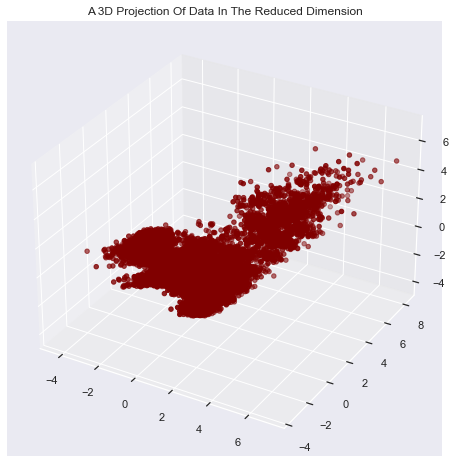

In [104]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

### ***A3. Build a hybrid model with the k-means and agglomerative clsutering***

Elbow Method to determine the number of clusters to be formed:


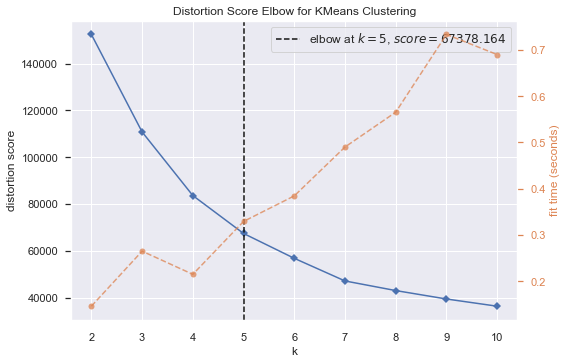

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [105]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
# from matplotlib.colors import ListedColormap
# from sklearn import metrics
# import warnings
# import sys

#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df_bm_p["Clusters"]= yhat_AC

### ***A4. Visualize the clusters in terms of key predictors***

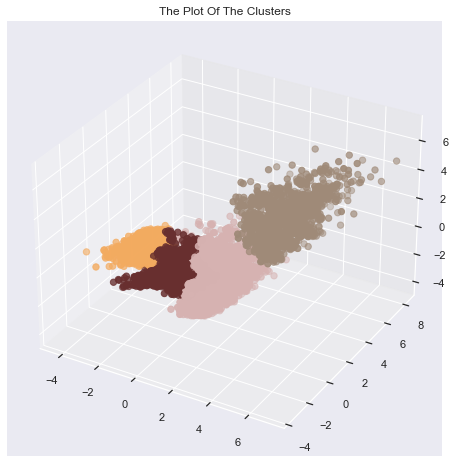

In [ ]:
#Plotting the clusters
from matplotlib import colors
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])


fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

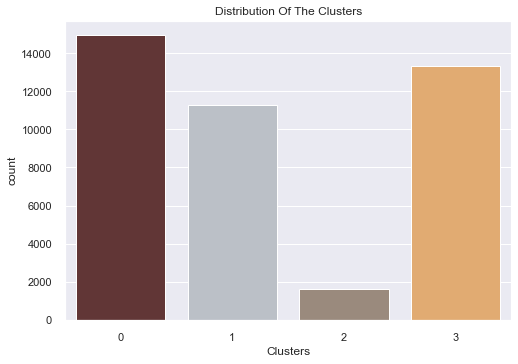

In [ ]:
import seaborn as sns
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df_bm_p["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

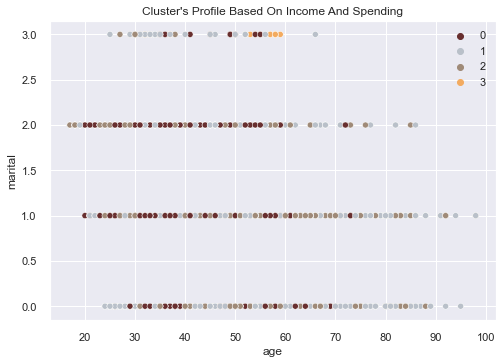

In [ ]:
pl = sns.scatterplot(data = df_bm_p,x=df_bm_p["age"], y=df_bm_p["marital"],hue=df_bm_p["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

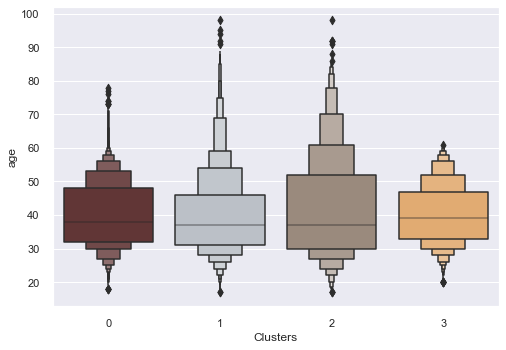

In [ ]:

plt.figure()
# pl=sns.swarmplot(x=df_bm_p["Clusters"], y=df_bm_p["education"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_bm_p["Clusters"], y=df_bm_p["age"], palette=pal)
plt.show()

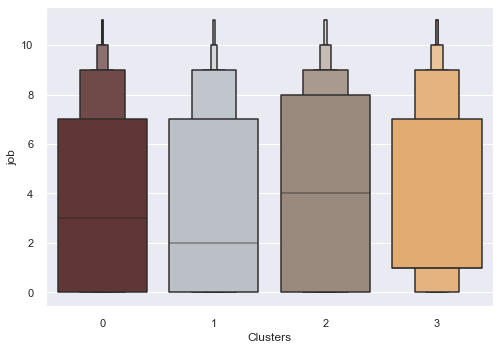

In [ ]:

plt.figure()
# pl=sns.swarmplot(x=df_bm_p["Clusters"], y=df_bm_p["education"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_bm_p["Clusters"], y=df_bm_p["job"], palette=pal)
plt.show()

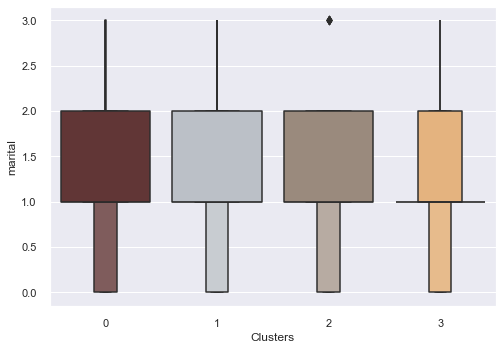

In [ ]:

plt.figure()
# pl=sns.swarmplot(x=df_bm_p["Clusters"], y=df_bm_p["education"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_bm_p["Clusters"], y=df_bm_p["marital"], palette=pal)
plt.show()

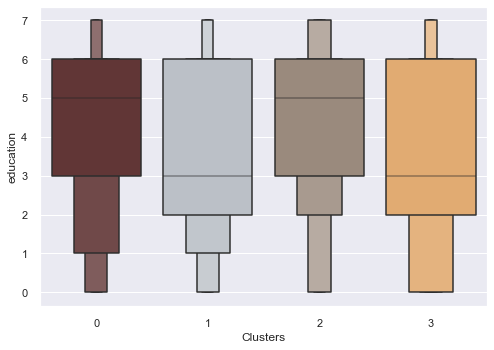

In [ ]:

plt.figure()
# pl=sns.swarmplot(x=df_bm_p["Clusters"], y=df_bm_p["education"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_bm_p["Clusters"], y=df_bm_p["education"], palette=pal)
plt.show()

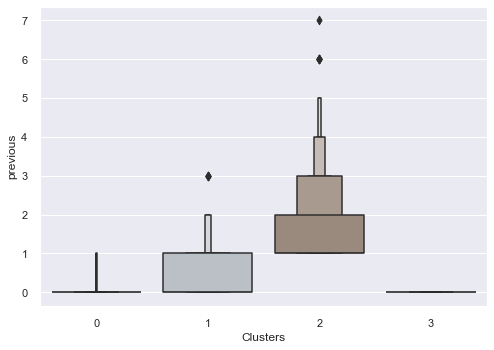

In [ ]:

plt.figure()
# pl=sns.swarmplot(x=df_bm_p["Clusters"], y=df_bm_p["education"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_bm_p["Clusters"], y=df_bm_p["previous"], palette=pal)
plt.show()

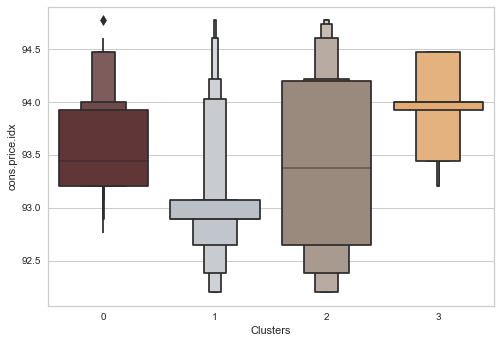

In [ ]:

plt.figure()
# pl=sns.swarmplot(x=df_bm_p["Clusters"], y=df_bm_p["education"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_bm_p["Clusters"], y=df_bm_p["cons.price.idx"], palette=pal)
plt.show()

<Figure size 576x396 with 0 Axes>

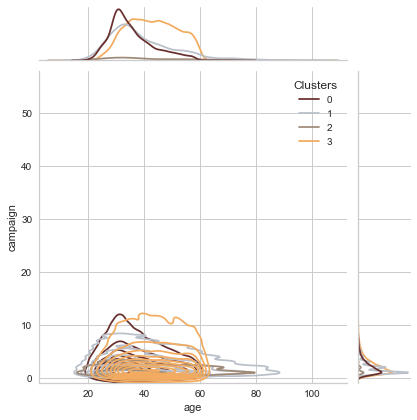

<Figure size 576x396 with 0 Axes>

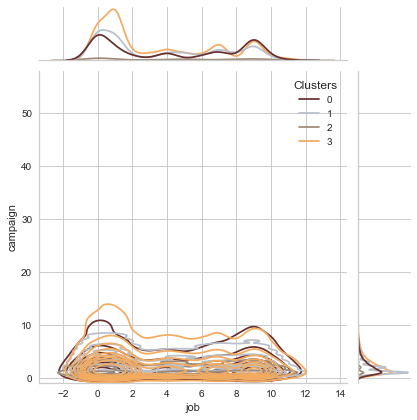

<Figure size 576x396 with 0 Axes>

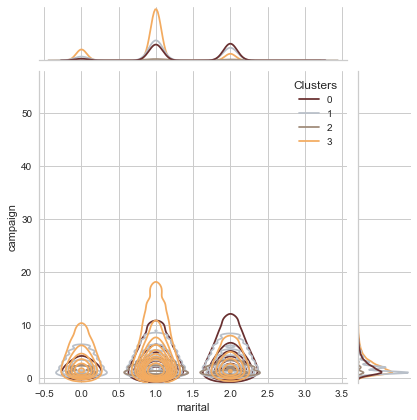

<Figure size 576x396 with 0 Axes>

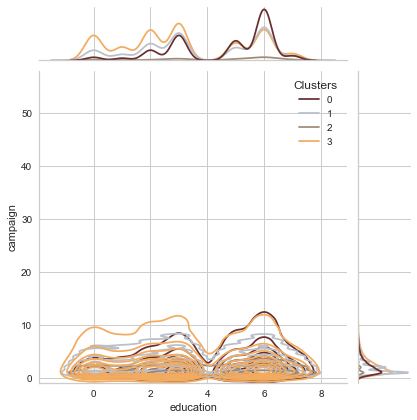

<Figure size 576x396 with 0 Axes>

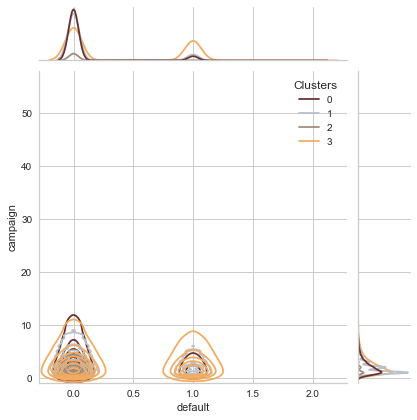

<Figure size 576x396 with 0 Axes>

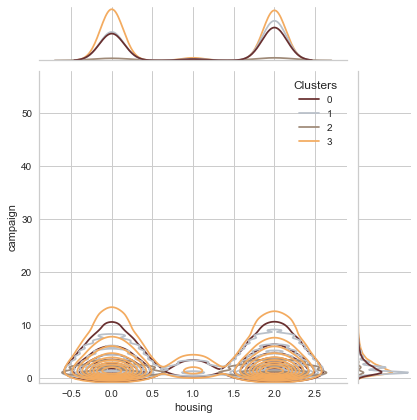

In [ ]:
Personal = ['age','job','marital','education','default','housing','loan','contact','month','campaign']

for i in Personal:
    plt.figure()
    sns.jointplot(x=df_bm_p[i], y=df_bm_p["campaign"], hue =df_bm_p["Clusters"], kind="kde", palette=pal)
    plt.show()

<br><br>

# **B. Association Rules**

Like Netflix, a TV show recommender system can always be built with context-based filtering or collaborative filtering.<br> 
With a data set (the “TV_Shows-Association_Rules_Learning.csv” file), association rules can be identified by association rules using the “apriori” algorithm.<br>
The dataset includes details of more than 9,000 viewers watching TV shows. Each row represents the TV shows a viewer has watched together.

<br><br>
### ***A0. Preparing***

In [3]:
import pandas as pd 
import seaborn as sns 
import matplotlib
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

df_tv = pd.read_csv('TV_Shows-Association_Rules_Learning.csv')
len(df_tv)
df_tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9689 entries, 0 to 9688
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cobra Kai    9689 non-null   object
 1   Lupin        7556 non-null   object
 2   12 Monkeys   5946 non-null   object
 3   Sherlock     4666 non-null   object
 4   Unnamed: 4   3678 non-null   object
 5   Unnamed: 5   2837 non-null   object
 6   Unnamed: 6   2197 non-null   object
 7   Unnamed: 7   1664 non-null   object
 8   Unnamed: 8   1231 non-null   object
 9   Unnamed: 9   887 non-null    object
 10  Unnamed: 10  644 non-null    object
 11  Unnamed: 11  464 non-null    object
 12  Unnamed: 12  348 non-null    object
 13  Unnamed: 13  272 non-null    object
 14  Unnamed: 14  196 non-null    object
 15  Unnamed: 15  141 non-null    object
 16  Unnamed: 16  95 non-null     object
 17  Unnamed: 17  66 non-null     object
 18  Unnamed: 18  52 non-null     object
 19  Unnamed: 19  38 non-null   

### ***B1. Prepare the data to find out association rules and drop NA***

In [4]:
#Converting the data frame into a list of lists 
records = []
for i in range (0, len(df_tv)):
    records.append([str(df_tv.values[i,j]) for j in range(0, 32)])

In [5]:
TE = TransactionEncoder()
array = TE.fit(records).transform(records)
#building the data frame rows are logical and columns are the items have been purchased 
transf_df = pd.DataFrame(array, columns = TE.columns_)
transf_df.head()

,12 Monkeys,24,Absentia,Alice in Borderland,Altered Carbon,American Gods,Another Life,Archer,Arrow,Atypical,...,Two and a half men,Upload,Vikings,Watchmen,Westworld,White Collar,X-Files,You,Young Sheldon,nan
0,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [6]:
transf_df.describe()

,12 Monkeys,24,Absentia,Alice in Borderland,Altered Carbon,American Gods,Another Life,Archer,Arrow,Atypical,...,Two and a half men,Upload,Vikings,Watchmen,Westworld,White Collar,X-Files,You,Young Sheldon,nan
count,9689,9689,9689,9689,9689,9689,9689,9689,9689,9689,...,9689,9689,9689,9689,9689,9689,9689,9689,9689,9689
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
freq,9122,9647,8942,9449,9657,9664,9667,9129,9436,8333,...,7910,9586,9362,9674,9645,9372,9625,9654,9678,9688


In [7]:
'''check col names'''

transf_df.columns.values

array(['12 Monkeys', '24', 'Absentia', 'Alice in Borderland',
       'Altered Carbon', 'American Gods', 'Another Life', 'Archer',
       'Arrow', 'Atypical', 'Banshee', 'Berlin Station',
       'Better Call Saul', 'Big Little Lies', 'Billions', 'Black Clover',
       'Bojack Horseman', 'Breaking Bad', 'Brooklyn Nine Nine',
       'Chernobyl', 'Cobra Kai', 'Constantine', 'Daredevil', 'Dark',
       'Death Note', 'Deception', 'Demon Slayer', 'Designated Survivor',
       'Dexter', 'Doctor Who', 'Dr Stone', 'Dr. House', 'Elementary',
       'Elite', 'Emily in Paris', 'Euphoria', 'Family Guy', 'Friends',
       'Fringe', 'Game of thrones', 'Goliath', 'Good Omens', 'Gotham',
       "Grey's Anatomy", 'Grimm', 'Hanna', 'Haven', 'Heros',
       'His Dark Materials', 'Homeland', 'House of Cards',
       'How I met your mother', 'How to get away with murder', 'Hunters',
       'Inhumans', 'Inside Job', 'Into the night', 'Invincible',
       'Iron Fist', 'Jack Ryan', 'Kingdom', 'Locke & Key', 'Lo

In [8]:
#drop nan column
basket_clean = transf_df.drop(['nan'], axis = 1)
basket_clean

,12 Monkeys,24,Absentia,Alice in Borderland,Altered Carbon,American Gods,Another Life,Archer,Arrow,Atypical,...,True Detective,Two and a half men,Upload,Vikings,Watchmen,Westworld,White Collar,X-Files,You,Young Sheldon
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9684,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9685,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
9686,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9687,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### ***B2. Visualize the most popular 10 items in the data set***

12 Monkeys             567
24                      42
Absentia               747
Alice in Borderland    240
Altered Carbon          32
                      ... 
Westworld               44
White Collar           317
X-Files                 64
You                     35
Young Sheldon           11
Length: 156, dtype: int64


C:\Users\he125\AppData\Local\Temp\ipykernel_15260\3424132316.py:3: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  pop_item = count.sort_values(0, ascending = False).head(10)


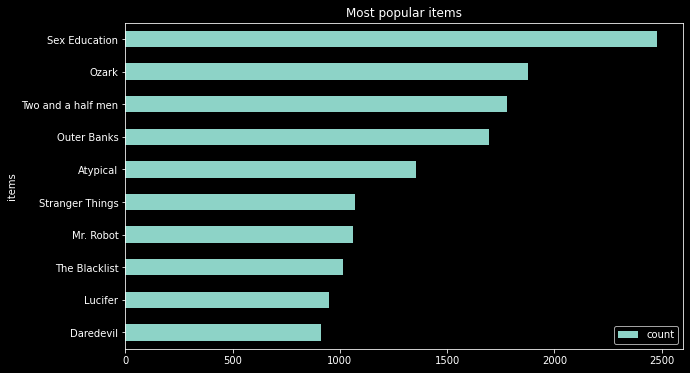

In [9]:
#most popular items
count = basket_clean.loc[:,:].sum()
pop_item = count.sort_values(0, ascending = False).head(10)
pop_item = pop_item.to_frame()
pop_item = pop_item.reset_index()
pop_item = pop_item.rename(columns = {"index": "items", 0: "count"})
print(count)
#Data Visualization
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
matplotlib.style.use('dark_background')
ax = pop_item.plot.barh(x = 'items', y = 'count')
plt.title('Most popular items')
plt.gca().invert_yaxis()

### ***B3. Show a list of association rules***

In [71]:
#지지도가 0.05 이상인 데이터만 추출
    # 지지도: 전체 항목 중 x와 y를 모두 포함하는 경우의 비율

    # it showing frequent itemset

a_rules = apriori(basket_clean, min_support = 0.04 , use_colnames = True)
a_rules_sort =a_rules.sort_values(ascending=False,by='support')

a_rules_sort.head(10)

,support,itemsets
23,0.255651,(Sex Education)
21,0.193725,(Ozark)
31,0.183610,(Two and a half men)
20,0.175044,(Outer Banks)
3,0.139953,(Atypical)
25,0.110435,(Stranger Things)
18,0.109402,(Mr. Robot)
26,0.104861,(The Blacklist)
17,0.097946,(Lucifer)
7,0.093921,(Daredevil)


itemsets가 1개인 경우는 배제하고 2개인 경우를 보면 두 item이 서로 연관되어 있음을 알  수 있다.
<br><br>

In [75]:
rules = association_rules(a_rules,
                          metric = 'lift',
                          min_threshold = 1, # 최소 lift(향상도) 기준
                          )
rules_fin = rules.sort_values(ascending=False, by=['support','confidence','lift'])
rules_fin[rules_fin['confidence'] > 0.4]

    #지지도: 전체 항목 중 x와 y를 모두 포함하는 경우의 비율
    
    #신뢰도 : x가 있을 때 y도 있는 비율(조건부 확률)
        # == X가 선택되었을 때, Y도 선택될 '확률'
    
    #향상도 : 우연적 기회를 벗어나기 위한 값. 
        # 향상도 = 신뢰도 / 지지도
            # lift == 1 : 우연으로 x와 y의 관계가 독립적 : 의미없음
            # lift > 1 : 양의 상관관계임
            # lift < 1 : 음의 상관관계임
        
    # antecedents: 조건절
    # consequents: 결과절
        #-> ant일 경우 -> conseq 이다.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Atypical),(Sex Education),0.139953,0.255651,0.056146,0.401180,1.569250,0.020367,1.243027
7,(Mr. Robot),(Sex Education),0.109402,0.255651,0.048921,0.447170,1.749143,0.020953,1.346434
5,(Mr. Robot),(Ozark),0.109402,0.193725,0.047580,0.434906,2.244966,0.026386,1.426797
13,(The Blacklist),(Sex Education),0.104861,0.255651,0.042316,0.403543,1.578495,0.015508,1.247952


### ***B4. Recommend several item sets of the TV shows based on the support, confidence, lift measures***

**Conditions of a Recommendation** <br>

    - Minimum Support : 0.04
    - Minimum Confidence : 0.04
    - Minimum Lift : over 1 ( positive )
<br>

**Recommendations**
1. Atypical -> Sex Education
2. Mr.Robot -> Sex Education, Ozark
3. The Blacklist -> Sex Education